In [33]:
# Training neural network to classify handwritten digits exercise
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from torch import nn
import torch.nn.functional as F
import torch

import helper

import matplotlib.pyplot as plt

In [3]:
# Downloading MNIST data set using torchvision
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

100%|█████████▉| 9912320/9912422 [01:06<00:00, 100899.19it/s]

Extracting /Users/thankaselv.kumaresan/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /Users/thankaselv.kumaresan/.pytorch/MNIST_data/MNIST/raw



0it [00:00, ?it/s]


  0%|          | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 36166.05it/s]                           

0it [00:00, ?it/s]

Extracting /Users/thankaselv.kumaresan/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/thankaselv.kumaresan/.pytorch/MNIST_data/MNIST/raw



 74%|███████▎  | 1212416/1648877 [00:12<00:03, 132563.09it/s]
9920512it [01:20, 100899.19it/s]                             
 98%|█████████▊| 1622016/1648877 [00:15<00:00, 131430.08it/s]

0it [00:00, ?it/s]

Extracting /Users/thankaselv.kumaresan/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/thankaselv.kumaresan/.pytorch/MNIST_data/MNIST/raw




8192it [00:00, 15824.72it/s]            

Extracting /Users/thankaselv.kumaresan/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/thankaselv.kumaresan/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!




1654784it [00:32, 131430.08it/s]                             

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


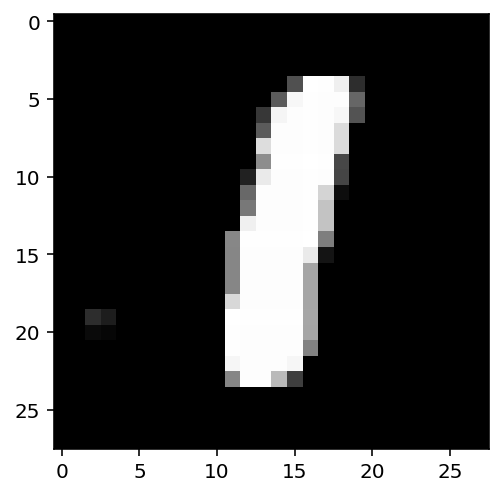

In [8]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [11]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [19]:
# Generating random weights and bias
torch.manual_seed(5)
n_input = 784    # Number of input units-28x28
n_hidden = 256    # Number of hidden units 
n_output = 10

W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden, n_output)
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

# Flattening images - Understood this logic from https://deeplizard.com/learn/video/fCVuiW9AFzY
def flatten(t):
    t = t.reshape(t.shape[0], -1)
    t = t.squeeze()
    return t

images_flat_input = flatten(images)

In [20]:
output_l1 = activation(torch.mm(images_flat_input, W1)+B1)
output_l2 = torch.mm(output_l1, W2)+B2

In [28]:
# Defining softmax function
def softmax(x):
    sum = torch.sum(torch.exp(x), dim=1).view(-1, 1)
    return torch.exp(x)/sum

In [29]:
probabilities = softmax(output_l2)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [36]:
# Building neural network using NN Module
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)